In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

filename = 'Chicago_Crimes_2012_to_2017.csv'
df = pd.read_csv(filename)


In [3]:
data = pd.read_csv('Chicago_Crimes_2012_to_2017.csv')
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [26]:
data['Location Description'].value_counts().iloc[:15]

STREET                            330471
RESIDENCE                         233530
APARTMENT                         185023
SIDEWALK                          160891
OTHER                              55774
PARKING LOT/GARAGE(NON.RESID.)     41768
ALLEY                              31771
RESIDENTIAL YARD (FRONT/BACK)      30645
SMALL RETAIL STORE                 28803
SCHOOL, PUBLIC, BUILDING           25959
RESTAURANT                         25872
RESIDENCE-GARAGE                   25720
RESIDENCE PORCH/HALLWAY            25511
VEHICLE NON-COMMERCIAL             25104
DEPARTMENT STORE                   20709
Name: Location Description, dtype: int64

In [6]:
data['Primary Type'].value_counts().iloc[:15]

THEFT                         329460
BATTERY                       263700
CRIMINAL DAMAGE               155455
NARCOTICS                     135240
ASSAULT                        91289
OTHER OFFENSE                  87874
BURGLARY                       83397
DECEPTIVE PRACTICE             75495
MOTOR VEHICLE THEFT            61138
ROBBERY                        57313
CRIMINAL TRESPASS              36912
WEAPONS VIOLATION              17233
PUBLIC PEACE VIOLATION         13122
OFFENSE INVOLVING CHILDREN     11398
PROSTITUTION                    7633
Name: Primary Type, dtype: int64

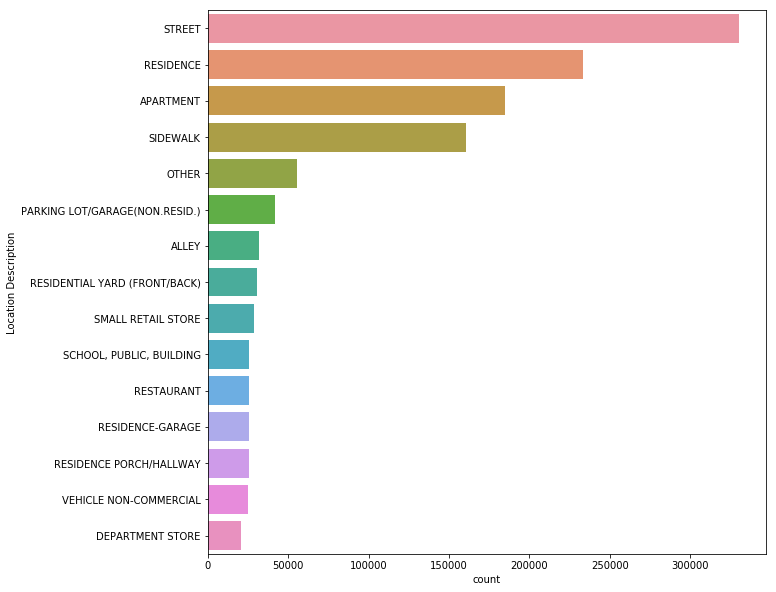

In [7]:
plt.figure(figsize = (10, 10))
sns.countplot(y = 'Location Description', data = data, order = data['Location Description'].value_counts().iloc[:15].index)

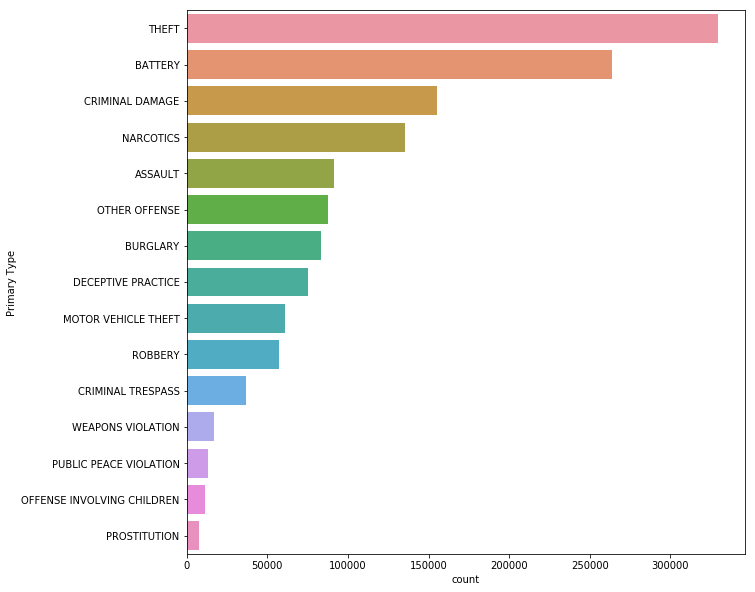

In [8]:
plt.figure(figsize = (10, 10))
sns.countplot(y = 'Primary Type', data = data, order = data['Primary Type'].value_counts().iloc[:15].index)

In [9]:
location = data.groupby('Community Area').first()
location.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Community Area,,,,,,,,,,,,,,,,,,,,,,
0.0,852174,9940426,HY114520,01/14/2015 10:15:00 AM,007XX W OHARE ST,1350,CRIMINAL TRESPASS,TO STATE SUP LAND,AIRPORT EXTERIOR - SECURE AREA,True,False,1654,16.0,23.0,26,1094587.0,1945065.0,2015,08/17/2015 03:03:40 PM,42.006074,-87.927365,"(42.006074109, -87.927364891)"
1.0,1868,10508709,HZ250523,05/03/2016 04:00:00 PM,014XX W DEVON AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,2432,24.0,40.0,08B,1165696.0,1942616.0,2016,05/10/2016 03:56:50 PM,41.998131,-87.665814,"(41.99813061, -87.665814038)"
2.0,17988,10509800,HZ251202,05/03/2016 10:00:00 PM,065XX N WHIPPLE ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,2412,24.0,50.0,07,1154820.0,1943117.0,2016,05/10/2016 03:56:50 PM,41.999731,-87.705810,"(41.99973106, -87.705809711)"
3.0,17094,10509724,HZ251141,05/03/2016 09:35:00 PM,050XX N PAULINA ST,0560,ASSAULT,SIMPLE,HOSPITAL BUILDING/GROUNDS,False,False,2032,20.0,47.0,08A,1164323.0,1933390.0,2016,05/10/2016 03:56:50 PM,41.972843,-87.671127,"(41.972843435, -87.671127232)"
4.0,81684,10509229,HZ250884,05/04/2016 12:01:00 AM,026XX W CATALPA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,RESIDENTIAL YARD (FRONT/BACK),False,False,2011,20.0,40.0,14,1157776.0,1936428.0,2016,05/11/2016 03:50:55 PM,41.981316,-87.695119,"(41.9813162, -87.695118674)"


In [10]:
new_location = location.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]
new_location.head()

,Latitude,Longitude,Location Description,Arrest
Community Area,,,,
0.0,42.006074,-87.927365,AIRPORT EXTERIOR - SECURE AREA,True
1.0,41.998131,-87.665814,SIDEWALK,False
2.0,41.999731,-87.705810,STREET,False
3.0,41.972843,-87.671127,HOSPITAL BUILDING/GROUNDS,False
4.0,41.981316,-87.695119,RESIDENTIAL YARD (FRONT/BACK),False


In [11]:
unique_location = data['Location'].value_counts()
unique_location.index

Index(['(41.883500187, -87.627876698)', '(41.754592961, -87.741528537)',
       '(41.979006297, -87.906463155)', '(41.897895128, -87.624096605)',
       '(41.742710224, -87.634088181)', '(41.909664252, -87.742728815)',
       '(41.896888586, -87.628203192)', '(41.885487535, -87.726422045)',
       '(41.868541914, -87.639235361)', '(41.976290414, -87.905227221)',
       ...
       '(41.813034457, -87.615246672)', '(41.899963544, -87.717682277)',
       '(41.94617539, -87.662176828)', '(41.88787566, -87.748761546)',
       '(41.960749953, -87.654718265)', '(42.001748944, -87.700973967)',
       '(41.808334439, -87.690940402)', '(41.819446913, -87.648808942)',
       '(41.785069478, -87.653923067)', '(41.728574708, -87.658486175)'],
      dtype='object', length=368286)

In [12]:
new_unique_location = pd.DataFrame({'Raw String' : unique_location.index, 'Values Count': unique_location})
new_unique_location.index = range(len(unique_location))
new_unique_location.head()

,Raw String,Values Count
0,"(41.883500187, -87.627876698)",2096
1,"(41.754592961, -87.741528537)",2084
2,"(41.979006297, -87.906463155)",1338
3,"(41.897895128, -87.624096605)",1320
4,"(41.742710224, -87.634088181)",1122


In [13]:
def location_extractor(string):
    
    values = string[1:-1].split(',')
    lat, long = values[0], values[1]
    
    return lat, long

In [14]:
new_unique_location['Location Coord'] = new_unique_location['Raw String'].apply(location_extractor)
new_unique_location = new_unique_location.drop('Raw String', axis = 1)
new_unique_location.head()

,Values Count,Location Coord
0,2096,"(41.883500187, -87.627876698)"
1,2084,"(41.754592961, -87.741528537)"
2,1338,"(41.979006297, -87.906463155)"
3,1320,"(41.897895128, -87.624096605)"
4,1122,"(41.742710224, -87.634088181)"


In [15]:
data_theft = data[data['Primary Type'] == 'THEFT']
data_theft.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"
12,2193,10508717,HZ250415,05/03/2016 05:30:00 PM,011XX W JACKSON BLVD,0890,THEFT,FROM BUILDING,OTHER,False,False,1232,12.0,2.0,28.0,06,1168776.0,1898793.0,2016,05/10/2016 03:56:50 PM,41.877812,-87.655758,"(41.877811861, -87.655758012)"
13,2279,10508724,HZ250513,05/03/2016 09:00:00 AM,028XX S DR MARTIN LUTHER KING JR DR,0820,THEFT,$500 AND UNDER,STREET,False,False,133,1.0,4.0,35.0,06,1179375.0,1886199.0,2016,05/10/2016 03:56:50 PM,41.843017,-87.617227,"(41.843016958, -87.61722727)"
14,2477,10508728,HZ250505,05/03/2016 10:08:00 PM,016XX N CLAREMONT AVE,0810,THEFT,OVER $500,STREET,False,False,1434,14.0,1.0,24.0,06,1160444.0,1910787.0,2016,05/10/2016 03:56:50 PM,41.910901,-87.686019,"(41.910900826, -87.686018747)"
16,3023,10508738,HZ250440,05/03/2016 09:45:00 PM,020XX W LE MOYNE ST,0810,THEFT,OVER $500,STREET,False,False,1424,14.0,1.0,24.0,06,1162515.0,1909832.0,2016,05/10/2016 03:56:50 PM,41.908237,-87.678437,"(41.908237096, -87.678437417)"


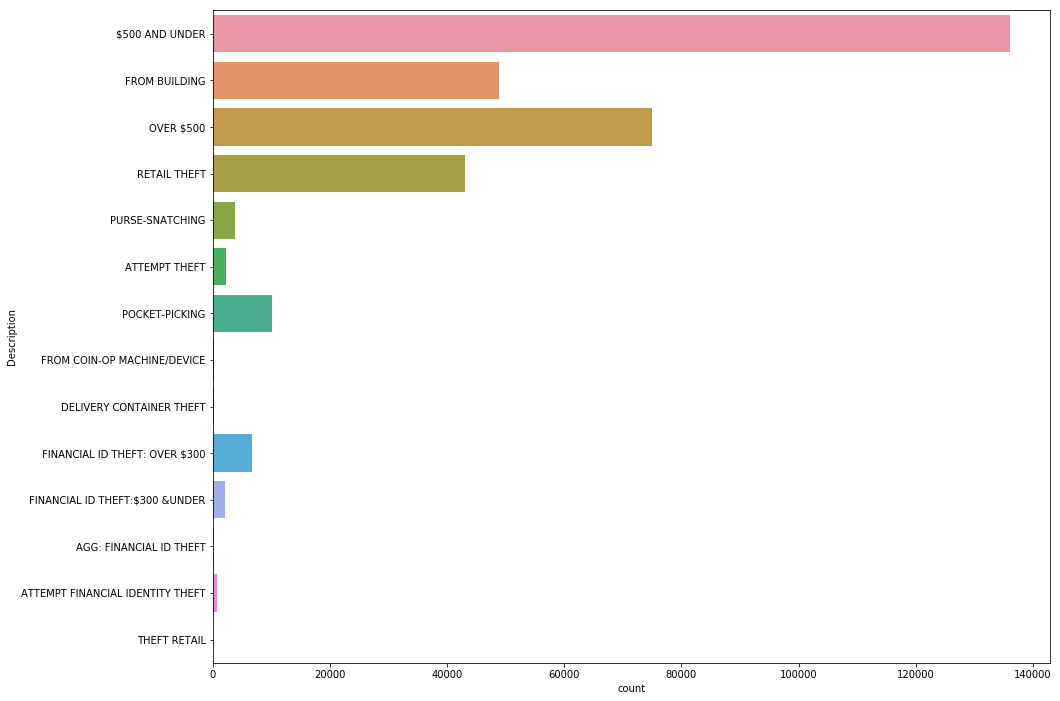

In [16]:
plt.figure(figsize = (15, 12))
sns.countplot(y = data_theft['Description'])

In [17]:
new_data_theft = pd.DataFrame({'Counts' : data_theft['Description'].value_counts(), 'Description' : data_theft['Description'].value_counts().index})
new_data_theft.reset_index(inplace=True)
new_data_theft = new_data_theft.drop(columns = ['index'], axis = 1)
new_data_theft.head()

,Counts,Description
0,136036,$500 AND UNDER
1,74906,OVER $500
2,48835,FROM BUILDING
3,43109,RETAIL THEFT
4,10169,POCKET-PICKING


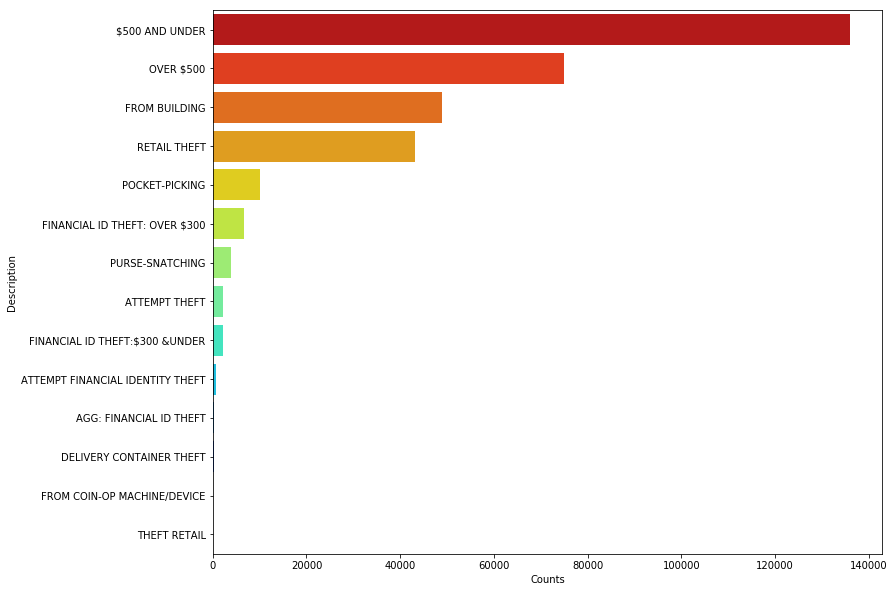

In [18]:
plt.figure(figsize = (12, 10))
sns.barplot(y = 'Description', x = 'Counts', data = new_data_theft, palette="jet_r")

In [19]:
data_theft['Date'] = pd.to_datetime(data_theft['Date'])
data_theft.head()

c:\users\welli\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
4,911,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"
12,2193,10508717,HZ250415,2016-05-03 17:30:00,011XX W JACKSON BLVD,0890,THEFT,FROM BUILDING,OTHER,False,False,1232,12.0,2.0,28.0,06,1168776.0,1898793.0,2016,05/10/2016 03:56:50 PM,41.877812,-87.655758,"(41.877811861, -87.655758012)"
13,2279,10508724,HZ250513,2016-05-03 09:00:00,028XX S DR MARTIN LUTHER KING JR DR,0820,THEFT,$500 AND UNDER,STREET,False,False,133,1.0,4.0,35.0,06,1179375.0,1886199.0,2016,05/10/2016 03:56:50 PM,41.843017,-87.617227,"(41.843016958, -87.61722727)"
14,2477,10508728,HZ250505,2016-05-03 22:08:00,016XX N CLAREMONT AVE,0810,THEFT,OVER $500,STREET,False,False,1434,14.0,1.0,24.0,06,1160444.0,1910787.0,2016,05/10/2016 03:56:50 PM,41.910901,-87.686019,"(41.910900826, -87.686018747)"
16,3023,10508738,HZ250440,2016-05-03 21:45:00,020XX W LE MOYNE ST,0810,THEFT,OVER $500,STREET,False,False,1424,14.0,1.0,24.0,06,1162515.0,1909832.0,2016,05/10/2016 03:56:50 PM,41.908237,-87.678437,"(41.908237096, -87.678437417)"


In [20]:
data_theft['Month'] = data_theft['Date'].apply(lambda x : x.month)

c:\users\welli\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
crime_month = pd.DataFrame({'Crime Count' : data_theft['Month'].value_counts(), 'Month' : data_theft['Month'].value_counts().index})
crime_month = crime_month.sort_values(['Month'], ascending = True)
crime_month.reset_index(inplace = True)
crime_month = crime_month.drop(columns = ['index'], axis = 1)
crime_month

,Crime Count,Month
0,26982,1
1,20667,2
2,24702,3
3,25686,4
4,27950,5
5,29539,6
6,31911,7
7,31679,8
8,29457,9
9,28986,10


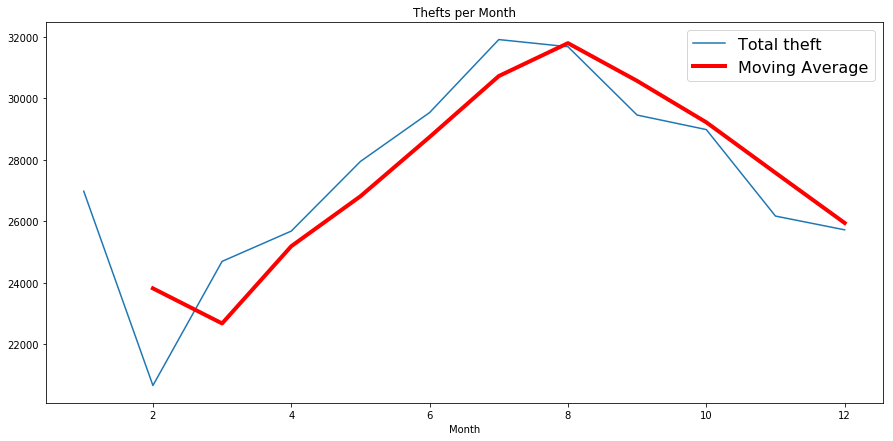

In [22]:
plt.figure(figsize = (15, 7))
plt.plot(crime_month['Month'], crime_month['Crime Count'], label = 'Total theft')
plt.plot(crime_month['Month'], crime_month['Crime Count'].rolling(window = 2).mean(), label = 'Moving Average', linewidth = 4, color = 'red')

plt.title('Thefts per Month')
plt.legend(prop = {'size' : 16})
plt.xlabel('Month')
plt.show();

In [23]:
data_theft_dates = data_theft['Location']
data_theft_dates.index = data_theft['Date']
resampled = data_theft_dates.resample('D')
data_theft_dates['MEAN'] = resampled.size().mean()
data_theft_dates['STD'] = resampled.size().std()

c:\users\welli\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\welli\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\series.py:1015: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
c:\users\welli\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

In [24]:
UCL = data_theft_dates['MEAN'] + 3 * data_theft_dates['STD']
LCL = data_theft_dates['MEAN'] -  3 * data_theft_dates['STD']

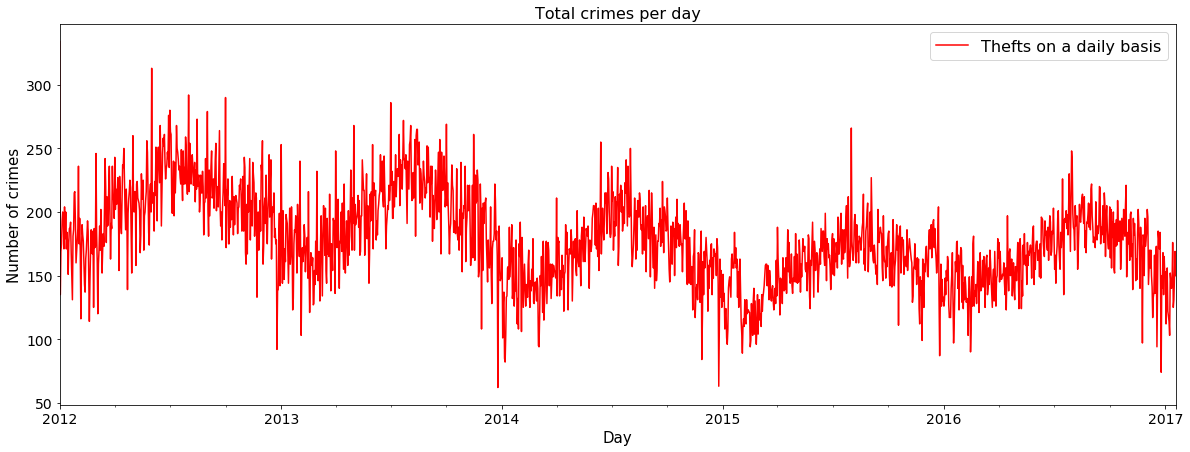

Wall time: 784 ms


In [25]:
%%time

plt.figure(figsize=(20, 7))
resampled.size().plot(label = "Thefts on a daily basis", color = 'red')
plt.title('Total crimes per day', fontsize=16)
plt.xlabel('Day', fontsize = 15)
plt.ylabel('Number of crimes', fontsize = 15)
plt.tick_params(labelsize=14)
plt.legend(prop={'size':16})
plt.show()